# <b> Importando as bibliotecas e dados </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [2]:
df = pd.read_csv('housing.csv')

# <b> Observando os dados </b>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


---

Drop nas linhas com valores nulos

In [6]:
print(df['ocean_proximity'].unique(), '\n')
print(df['ocean_proximity'].value_counts())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND'] 

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [7]:
df2 = pd.concat([df.drop(columns = ['ocean_proximity']), pd.get_dummies(df['ocean_proximity']).astype(int)], axis = 1)

In [8]:
df2 = df2.dropna(subset=['total_bedrooms'])

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

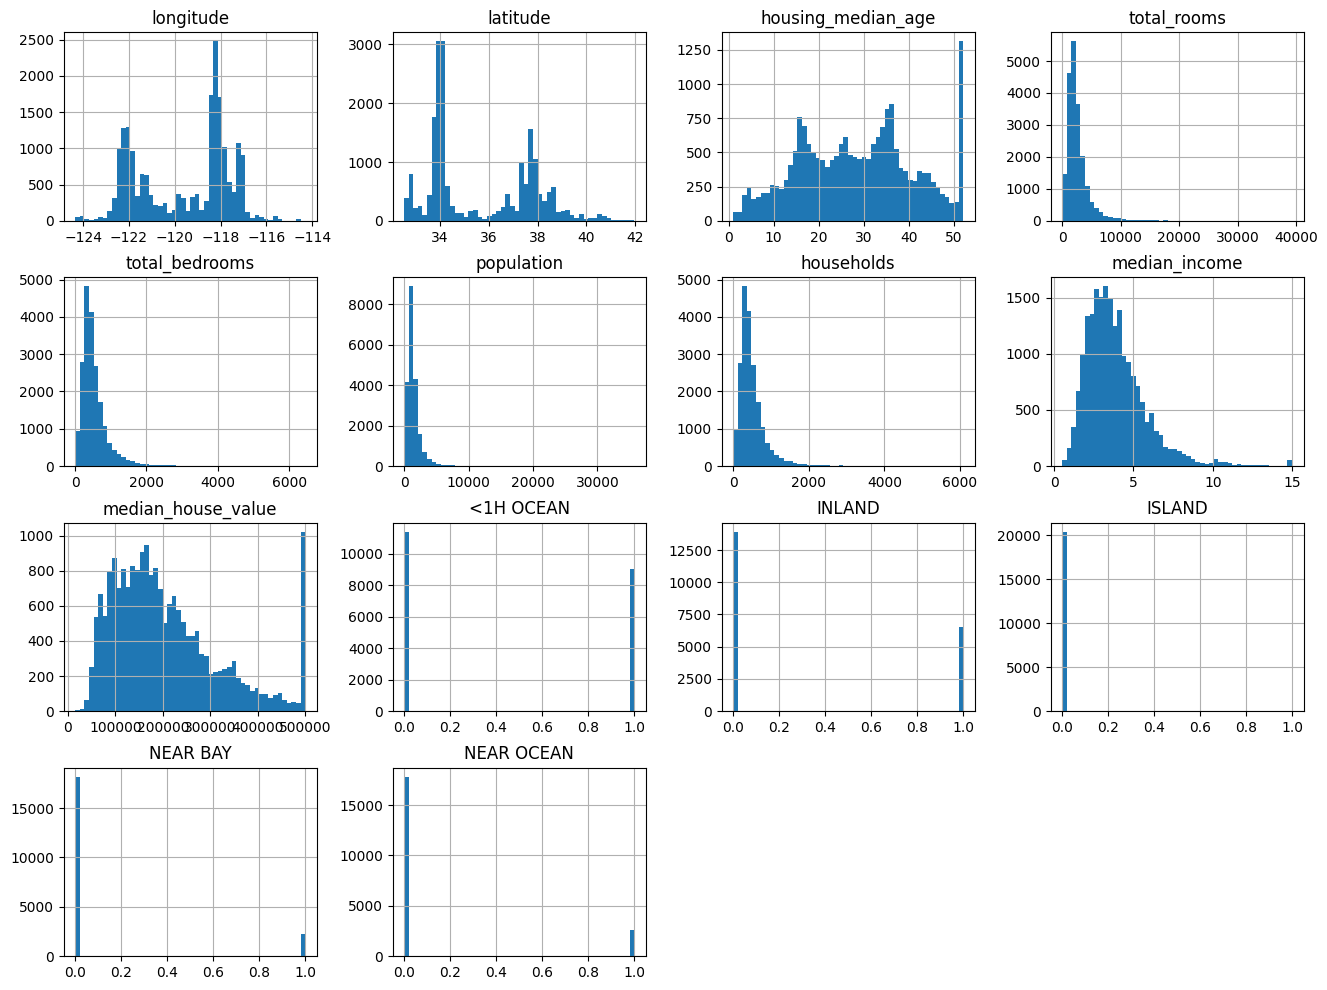

In [9]:
df2.hist(figsize=(16, 12), bins=50)

---

Claramente features relacionadas a quantidade de pessoas serão bem correlacionadas

<Axes: >

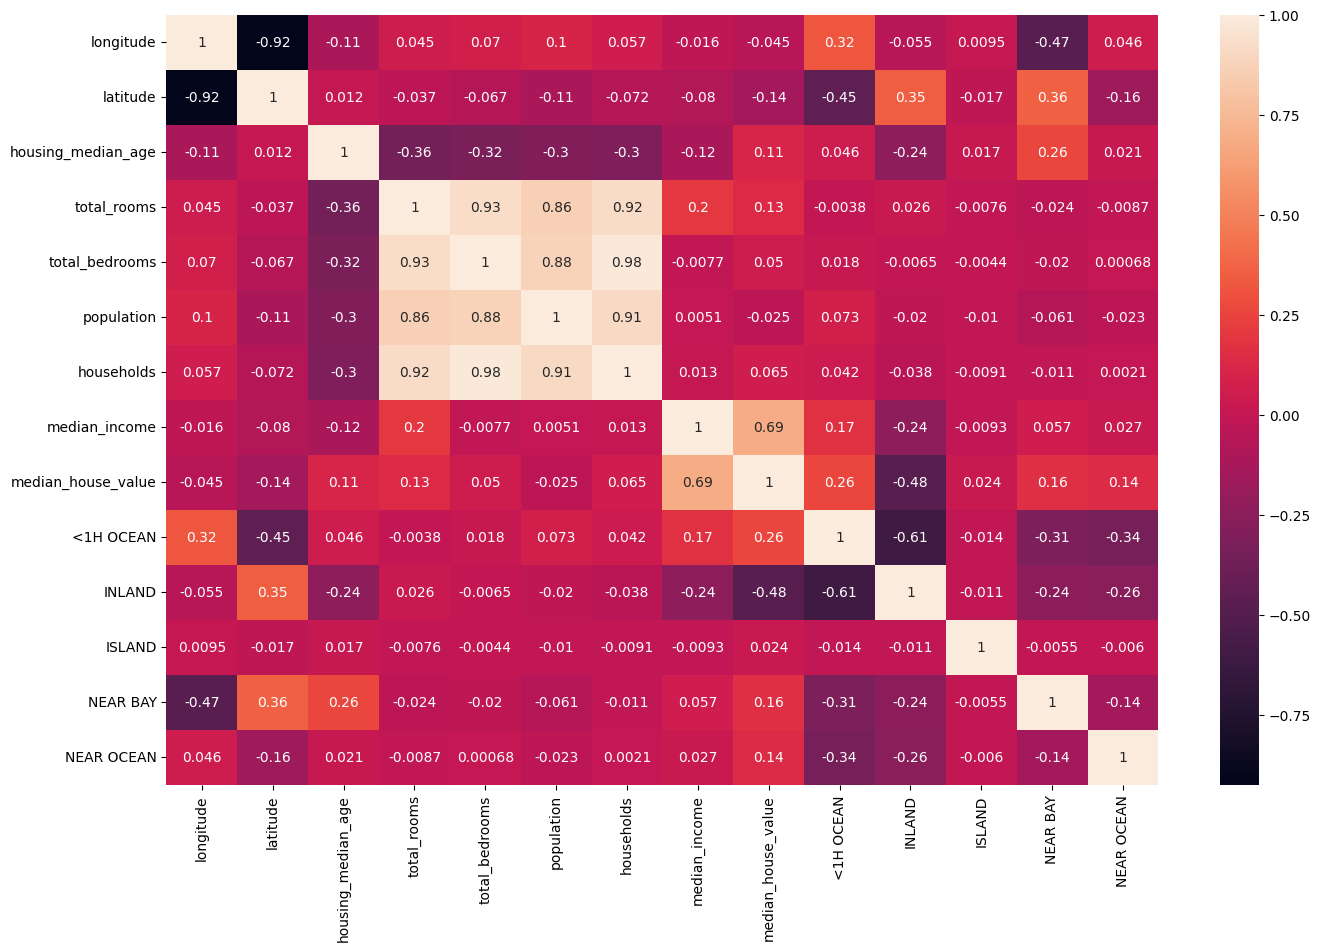

In [10]:
plt.figure(figsize=(16, 10))
sns.heatmap(df2.corr(), annot=True)

---

Levando em conta o mapa da Califórnia, claramente casas mais perto da praia serão mais caras

<Axes: xlabel='latitude', ylabel='longitude'>

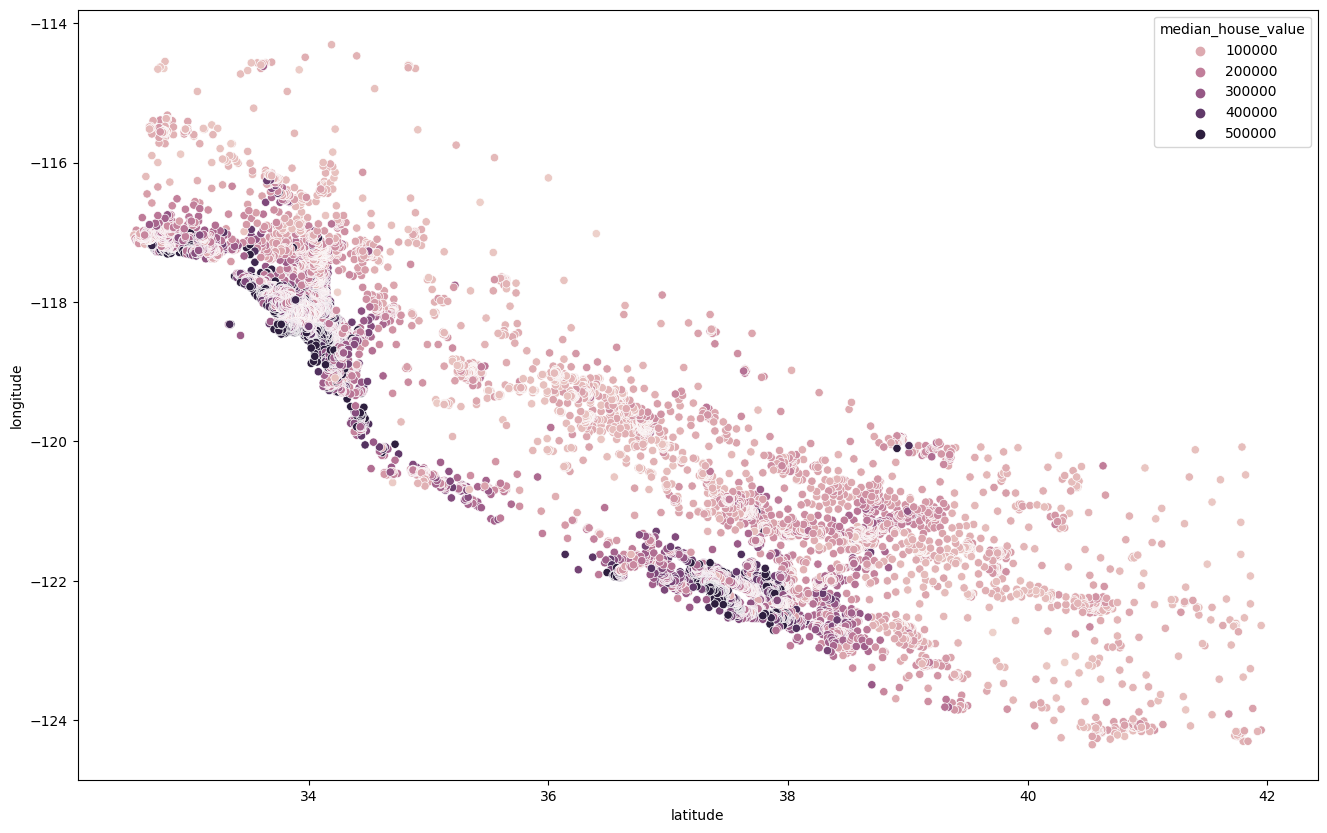

In [11]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x = "latitude", y = "longitude", data = df2, hue = "median_house_value")

# <b> Machine Learning </b>

## Regressão Linear <i> (from scratch) </i>

In [12]:
y = df2['median_house_value']
X = df2.loc[:, ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

X = X.to_numpy()
y = y.to_numpy()
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [13]:
print('X_train = ', X_train.shape)
print('y_train = ', y_train.shape)
print('X_test  = ', X_test.shape)
print('y_test  = ', y_test.shape)

X_train =  (16346, 13)
y_train =  (16346,)
X_test  =  (4087, 13)
y_test  =  (4087,)


---

In [14]:
#normalizando os dados
for i in range(X_train.shape[1]):
    avg = np.mean(X_train[:, i])
    stddev = np.std(X_train[:, i])
    X_train[:, i] = (X_train[:, i] - avg) / stddev
    X_test[:, i] = (X_test[:, i] - avg) / stddev

In [15]:
def add_column_of_ones(X):
    return np.hstack(( np.ones((X.shape[0],1)), X ) )

In [16]:
def loss_function(w, X, y):
    g = w.T @ X.T - y
    loss = (g.T @ g) / X.shape[0]
    return loss

In [17]:
def linear_training2(X, y, learning_rate = 1e-1, w0 = None, num_iterations = 1000, return_history = False):
    #transformando em x~
    X = add_column_of_ones(X) 

    #inicializando w como valor aleatório pequeno
    if w0 == None:
        w0 = np.random.normal(loc = 0, scale = 1, size = X.shape[1])

    list = [] #para guardar a curva de loss

    #rodando de acordo com o número de épocas
    for r in range(num_iterations):
        list.append(loss_function(w0, X, y))
        grad = np.zeros(w0.shape)

        #para todo (x, y) no dataset
        for i in range(X.shape[0]):
            y_hat = w0.T @ X[i]
            grad += (y[i] - y_hat)*X[i]
        w0 = w0 + learning_rate * grad

    list.append(loss_function(w0, X, y))

    if return_history == True:
        return w0, list
    else:
        return w0


In [18]:
def predict_linear(X, w):
    X = add_column_of_ones(X)
    pred_y = w.T @ X.T
    return pred_y

Final weight:
 [ 2.07007392e+05 -2.24951012e+04 -2.20292424e+04  1.40807900e+04
  6.18677144e+01  2.59685522e+04 -4.10862083e+04  2.12539511e+04
  7.24293891e+04  8.72949557e+03 -1.99457794e+04  3.20131536e+03
  5.33065993e+03  9.57186121e+03]

Final loss:
 4816285368.89704


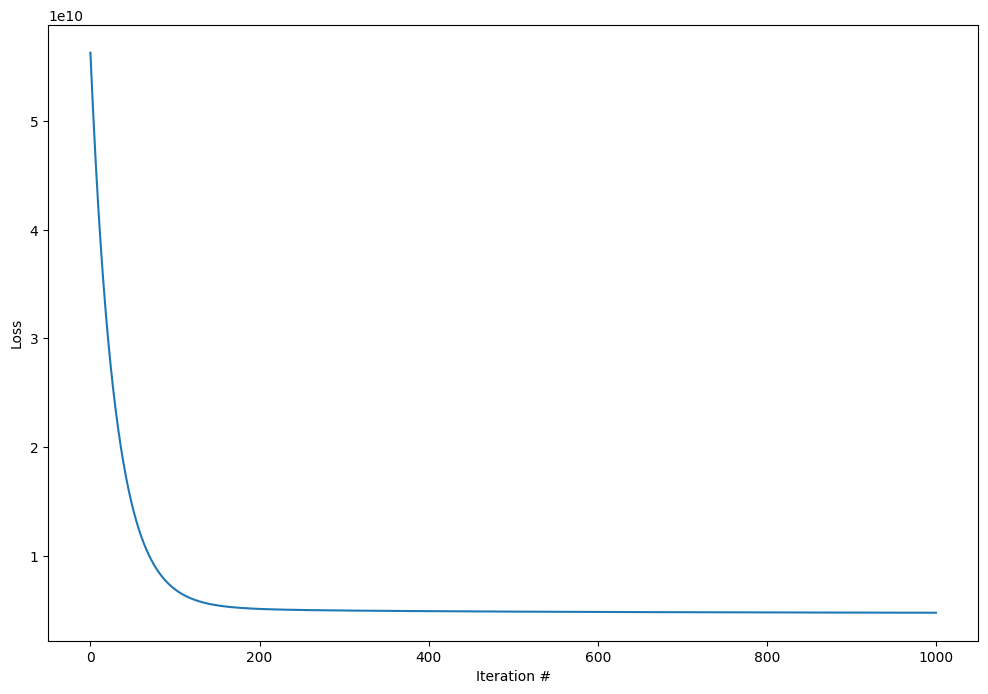

In [19]:
w_linear, loss = linear_training2(X_train, y_train, learning_rate=0.000001, num_iterations=1000, return_history=True)
print("\x1b[94mFinal weight:\n\x1b[0m", w_linear)
print("\n\x1b[94mFinal loss:\n\x1b[0m", loss[-1])

plt.figure(figsize = (12, 8))
plt.plot(loss)
plt.xlabel('Iteration #')
plt.ylabel('Loss')
plt.show()

In [20]:
prediction = predict_linear(X_test, w_linear)
r_2 = r2_score(y_test, prediction)
print("\x1b[92mErro:\x1b[0m", r_2)

Erro: 0.643054933421291


## Regressão linear <i> (com bibliotecas) </i>

In [25]:
reg = LinearRegression()
reg.fit(X_train, y_train)
prediction = reg.predict(X_test)
r_2 = r2_score(y_test, prediction)
print("\x1b[92mErro:\x1b[0m", r_2)

Erro: 0.6442732400247224


In [22]:
reg = LinearRegression()
cv = cross_validate(reg, X_train, y_train, cv=5, scoring=('r2', 'neg_mean_squared_error'))
score = cv['test_r2'].mean()
print('\x1b[93mUsing cross validation on data \x1b[0m')
print('\x1b[92mErro:\x1b[0m', score, '\n')

Using cross validation on data 
Erro: 0.6452464192094881 

